### CODE SUMMARY


READ ALL DATA                                                                                                                   

CONVERT RA, DEC TO SUITABLE DATA_VECTORS FROM THE DATA                                                                          

DIVIDE ICECUBE DATA TO 441 LENGTH VECTORS TO MATCH MSPSRDATA VECTOR SIZE                                                        

CIRCULARLY ITERATE THROUGH ICECUBE VECTORS TO GET SPACE ANGLES AT 441 x 441 ANGLES PER ITERATION FOR 2373 ITERATIONS            

PLOT THE RESULTS IN A GRAPH                                                                                                     


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
path = "/media/darkwake/VIB2/Project-IceCube/icecube_10year_ps/events"
filenames = ["IC40_exp.csv", "IC59_exp.csv","IC79_exp.csv", "IC86_I_exp.csv", "IC86_II_exp.csv",
 "IC86_III_exp.csv", "IC86_IV_exp.csv", "IC86_V_exp.csv", "IC86_VI_exp.csv", "IC86_VII_exp.csv"]

In [3]:
file = filenames[0]
f = open(os.path.join(path, file), 'r')

data = [0,0,0,0]
lines = f.readlines()
column=lines[0].split()
column.pop(0)
f.close()

#### ICECUBE DATA

In [4]:

content = []

for file in filenames:
    f = open(os.path.join(path, file), 'r')
    lines = f.readlines()
    for line in lines[1:]:
        content.append(line.split())
    f.close()



In [5]:
icdata = pd.DataFrame(content, columns=column)

#### MS_PULSAR DATA

In [6]:

f = open("10milsecpsr.txt", 'r')
lines = f.readlines()

content=[]
column=lines[3].split()

for line in lines[:]:
    content.append(line.split())

#the INITAL DATABASE IS CLUTTERED SO WE REMOVE THE NULL COLUMNS AND OTHER CLUTTER
mspdata = pd.DataFrame(content).drop(range(0,6)).dropna().drop([2,6,8,10,11,13,14], axis=1)
f.close()

mspdata.columns = column
content=[]
column=[]
file=[]
filenames=[]
f=[]

HAVERSINE FUNCTION TO CALCULATE SPACE ANGLE

In [7]:
def hvovec(lon1, lat1, lon2, lat2):

    #Convert decimal degrees to Radians:
    lon1 = np.radians(lon1)
    lat1 = np.radians(lat1)
    lon2 = np.radians(lon2)
    lat2 = np.radians(lat2)

    #Implementing Haversine Formula: 
    dlon = np.subtract(lon2, lon1)
    #dlat = np.subtract(lat2, lat1)

    a = np.add(np.multiply(np.sin(lat1), np.sin(lat2)), np.multiply(np.multiply(np.cos(lat1), np.cos(lat2)), np.cos(dlon)))

    return np.rad2deg(np.arccos(a))

STORE THE DATA IN VECTORS

In [8]:
icra = [float(i) for i in icdata['RA[deg]']]
icdec = [float(i) for i in icdata['Dec[deg]']]
icra.extend([0]*(243))
icdec.extend([0]*(243))
msra = [float(i) for i in mspdata['RAJD']]
msdec = [float(i) for i in mspdata['DECJD']]
icdata = []
mspdata = []

det = [hvovec(icra_s[i], icdec_s[i], msra, msdec) for i in range(0,len(icra_s))]

len(icra_s[8])

In [9]:
lg = int(len(icra)/len(msra))
p = len(msra)
r= []
for k in range(lg):
    ilo = icra[k * p  :p * k + p]
    ila = icdec[k * p  :p * k + p]
    lo =[]
    la = []
    for j in range(k,p + k):#441
                lo = [msra[(i + j)%p] for i in range(0,p)]
                la = [msdec[(i + j)%p] for i in range(0,p)]
                r.append(hvovec(ilo, ila, lo, la))
                

'''

READ ALL DATA                                                                                                                   Y

CONVERT RA, DEC TO SUITABLE DATA_VECTORS FROM THE DATA                                                                          Y

DIVIDE ICECUBE DATA TO 441 LENGTH VECTORS TO MATCH MSPSRDATA VECTOR SIZE                                                        Y

CIRCULARLY ITERATE THROUGH ICECUBE VECTORS TO GET SPACE ANGLES AT 441 x 441 ANGLES PER ITERATION FOR 2373 ITERATIONS            

PLOT THE RESULTS IN A GRAPH                                                                                                     
'''

In [10]:
r = np.ravel(r)

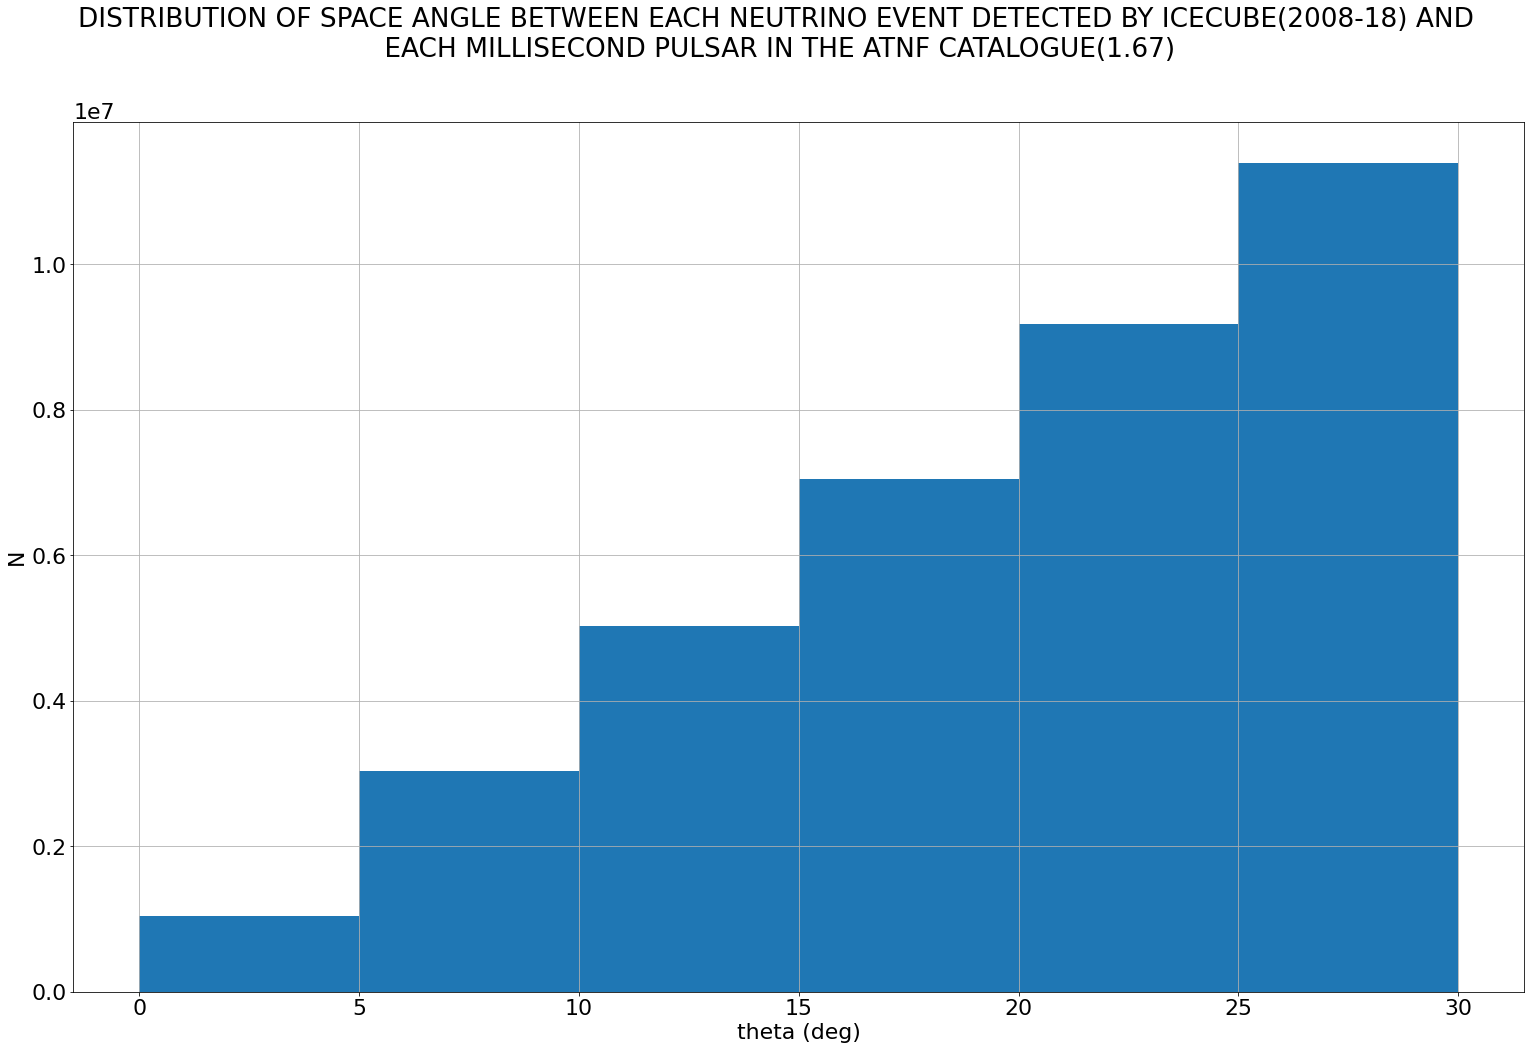

In [11]:
nbins = np.arange(0, 35, 5)
plt.figure(figsize=(26,16))
plt.rcParams.update({'font.size': 22})
plt.hist(r, bins= nbins)
plt.xlabel("theta (deg)")
plt.ylabel("N")
#plt.ylim([0, 8 * 10**6])
plt.suptitle('DISTRIBUTION OF SPACE ANGLE BETWEEN EACH NEUTRINO EVENT DETECTED BY ICECUBE(2008-18) AND\n EACH MILLISECOND PULSAR IN THE ATNF CATALOGUE(1.67)')
plt.grid(True, which="both")
#plt.show()
plt.savefig('output2a', facecolor='w')

OPTIONAL: USING 30 BINS, EACH 1 DEGREE WIDE, FOR BETTER RESOLUTION

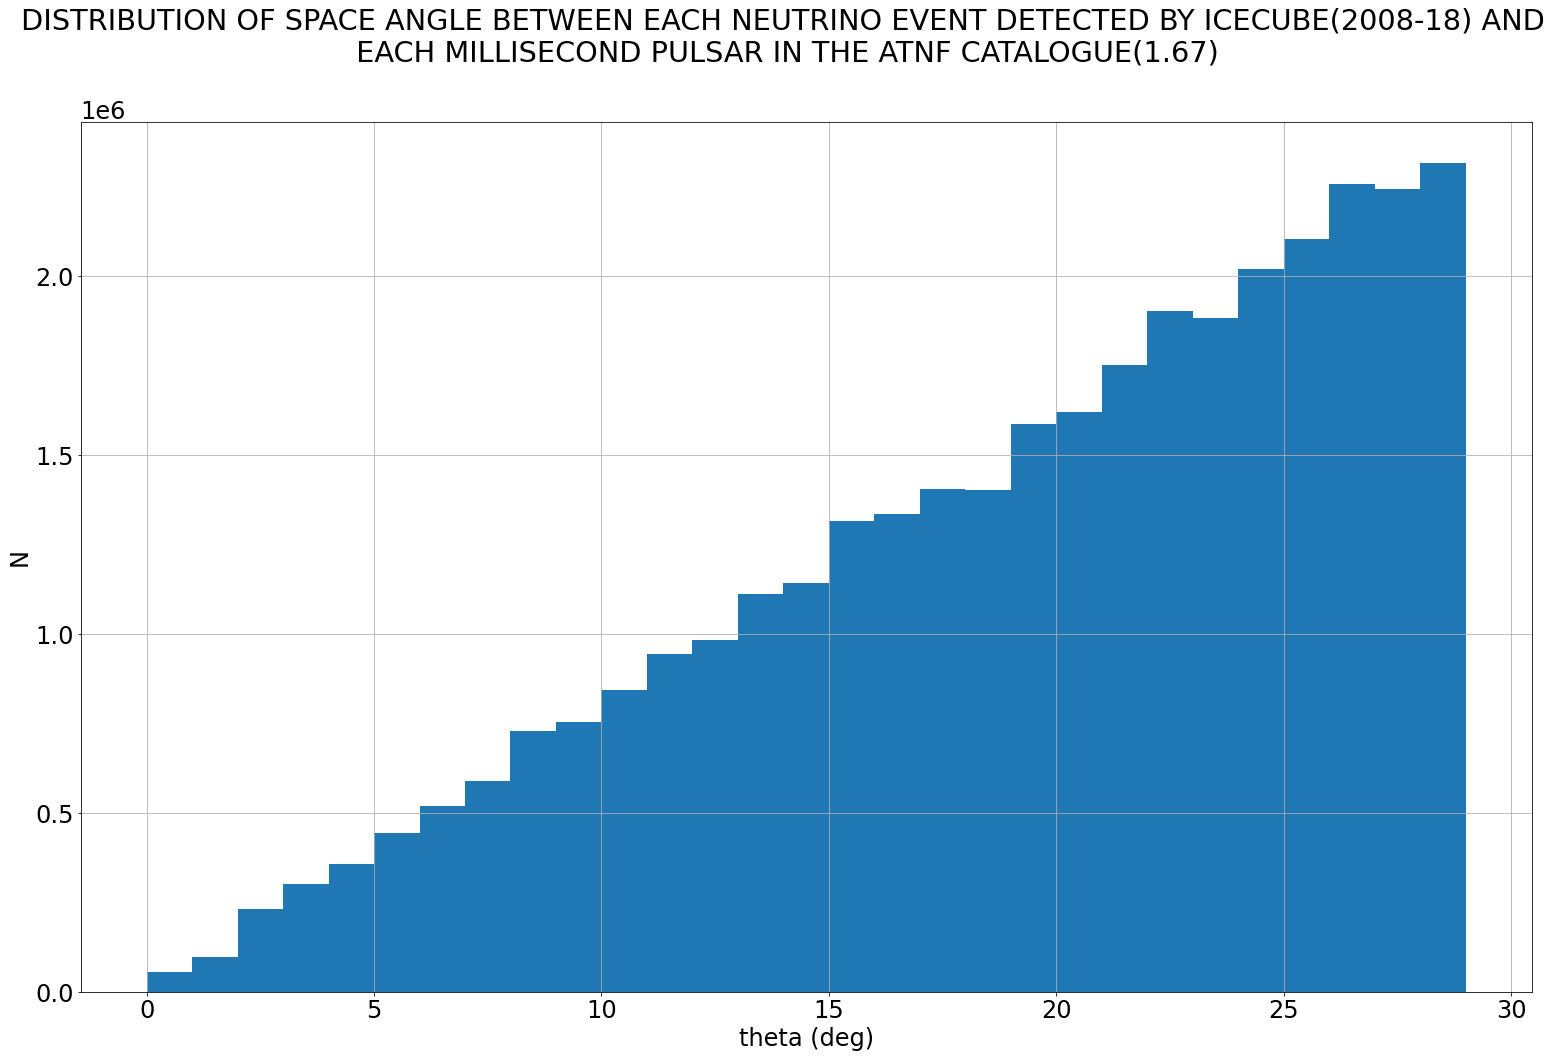

In [12]:
plt.figure(figsize=(26,16))
plt.rcParams.update({'font.size': 24})
plt.hist(r, bins= np.arange(0, 30))
plt.xlabel("theta (deg)")
plt.ylabel("N")
plt.ticklabel_format(style='sci', axis='y')
plt.suptitle('DISTRIBUTION OF SPACE ANGLE BETWEEN EACH NEUTRINO EVENT DETECTED BY ICECUBE(2008-18) AND\n EACH MILLISECOND PULSAR IN THE ATNF CATALOGUE(1.67)')
plt.grid(True, which="both")
plt.show()